# Project: Wrangling and Analyze Data

## Data Gathering

In [9]:
import pandas as pd
import numpy as np
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import string
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [35]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#Save tsv to file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [2]:
df_image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [3]:
# read the data into a dataframe using pd.read_json
df_tweet = pd.read_json('tweet_json.txt', lines=True)

In [4]:
import glob
# List of dictionaries to build file by file and later convert to a DataFrame
df_dict = {}
for tweet_json in glob.glob('tweet_json.txt'):
    with open(tweet_json, encoding='utf-8') as file:
        id_str = df_tweet.id_str
        retweet_count = df_tweet.retweet_count
        favorites_count = df_tweet.favorite_count
        
        # Append to list of dictionaries
        df_dict= {'tweet_id': id_str,'retweet_count': retweet_count,
                  'favorites_count': favorites_count}

In [5]:
df_tweets = pd.DataFrame(df_dict)

## Assessing Data

### Visual Assessment

In [10]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Several missing values in the above table, inconsistent name in name column and None value in doggo, floofer, pupper and puppo columns

In [11]:
df_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Inconsistent naming in p1,p2 and p3 columns such as mixture of small letter and Initial letter capitalisation, use of '_' and white space character, and use of '-' in names such as German_short-haired_pointer

In [12]:
df_tweets

,tweet_id,retweet_count,favorites_count
0,892420643555336192,7001,33803
1,892177421306343424,5299,29316
2,891815181378084864,3477,22042
3,891689557279858688,7223,36922
4,891327558926688256,7754,35300
...,...,...,...
2322,666049248165822464,37,89
2323,666044226329800704,115,247
2324,666033412701032448,36,100
2325,666029285002620928,39,112


The above table looks clean visually especially in quality

### Programmatic Assessment

#### 1. For Twitter_Archive

In [13]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [39]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [192]:
# State appropriate width of the text column otherwise hidden content will be displayed
pd.set_option("display.max_colwidth", 200)

# Investigate the values in the text column for rating whether thesame with the rating_numerator and rating_denominator
rating_check = df_twitter_archive[df_twitter_archive['rating_numerator'] > 15]
rating_check[['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [202]:
pd.set_option("display.max_colwidth", 200)

rating_check = df_twitter_archive[df_twitter_archive['rating_numerator'] < 1]
rating_check[['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


The recorded ratio value below are first the correct and then the wrong values for rating_numerator/rating_denominator with their respective tweet_id. 
832215909146226688 9.75/10 not 75/10, 786709082849828864 9.75/10 not 75/10, 835246439529840640 13/10 not 960/00, 680494726643068929 11.26/10 not 26/10. 716439118184652801 11/10 not 50/50, 	778027034220126208 11.27/10 not 27/10, 881633300179243008 13/10 not 17/10

In [40]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [98]:
# Checking unique values in name
df_twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [400]:
df_twitter_archive[df_twitter_archive['name'].str.lower() == df_twitter_archive.name].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

It appears the above lowercase names are not actually names

In [167]:
# Checking values in dog stage columns
(df_twitter_archive.doggo + df_twitter_archive.floofer + df_twitter_archive.pupper + df_twitter_archive.puppo).value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
dtype: int64

In [176]:
# checking further to see why there are two names in sum rows from the full_text in text column
#displayed with a wider column width
pd.set_option("display.max_colwidth", 200)
df_twitter_archive[(df_twitter_archive.pupper != 'None') & ((df_twitter_archive.doggo != 'None') | 
                  (df_twitter_archive.floofer != 'None') | (df_twitter_archive.puppo != 'None'))][[
    'tweet_id', 'text', 'pupper', 'floofer', 'doggo', 'puppo']]

,tweet_id,text,pupper,floofer,doggo,puppo
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",pupper,None,doggo,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,pupper,None,doggo,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",pupper,None,doggo,None
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,None,doggo,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,pupper,None,doggo,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",pupper,None,doggo,None
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",pupper,None,doggo,None
822,770093767776997377,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,pupper,None,doggo,None
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",pupper,None,doggo,None
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,pupper,None,doggo,None


This double dog stage name is probably caused by the interpretation of the picture of dog(s) being tweeted about. However further investigation will be needed to verify this claim.

In [54]:
# Check for Source Url name or title 
df_twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [45]:
df_twitter_archive.doggo.unique(), df_twitter_archive.floofer.unique(), df_twitter_archive.pupper.unique(), df_twitter_archive.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [60]:
df_twitter_archive.retweeted_status_id.nunique()

181

In [334]:
df_twitter_archive[['tweet_id', 'text']].sample(20)

,tweet_id,text
1701,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS
59,880872448815771648,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
1064,740995100998766593,This is Leo. He's a vape god. Blows o's for days. Probably drives a Subaru. Definitely owns multiple fedoras. 10/10 https://t.co/nt2x3fHaRJ
796,773247561583001600,This is Chip. He's a pupholder. Comes with the car. Requires frequent pettings. Shifts for you. 10/10 innovative af https://t.co/hG5WYT9ECn
2260,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb
1660,683078886620553216,Here we see a nifty leaping pupper. Feet look deadly. Sad that the holidays are over. 9/10 undeniably huggable https://t.co/ny8mnXhGOW
1264,709918798883774466,Meet Watson. He's a Suzuki Tickleboop. Leader of a notorious biker gang. Only one ear functional. 12/10 snuggable af https://t.co/R1gLc5vDqG
21,887705289381826560,This is Jeffrey. He has a monopoly on the pool noodles. Currently running a 'boop for two' midweek sale. 13/10 h*ckin strategic https://t.co/PhrUk20Q64
1173,720340705894408192,This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH
472,816450570814898180,Meet Moose. He doesn't want his friend to go back to college. 13/10 looks like you're staying home John https://t.co/LIhmM7i70k


#### 2. For Image_Predict

In [71]:
# check for null entries in columns especially to check if any entry without an image file
df_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [138]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [143]:
# statitical evaluation of confidence levels
df_image_predict[['p1_conf', 'p2_conf', 'p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [234]:
# checking for number of unique values of entries
df_image_predict.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [67]:
#checking for duplicates
df_image_predict.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [133]:
# Although the image url is thesame and the neural network rating same, the tweet_id is different 
#hence the above value_counts does not actually duplicates
df_image_predict[df_image_predict.jpg_url == 'https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True


In [134]:
df_image_predict.duplicated().sum()

0

In [136]:
df_image_predict.duplicated().value_counts()

False    2075
dtype: int64

#### 3. For df_tweets dataframe

In [141]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorites_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [147]:
df_tweets[['retweet_count', 'favorites_count']].describe()

,retweet_count,favorites_count
count,2327.000000,2327.000000
mean,2469.385905,7050.985819
std,4182.068194,10957.546903
min,1.000000,0.000000
25%,493.500000,1224.500000
50%,1148.000000,3050.000000
75%,2860.000000,8601.000000
max,70681.000000,144815.000000


In [84]:
df_tweets[df_tweets.retweet_count == 300]

,tweet_id,retweet_count,favorites_count
1906,674008982932058112,300,1082


## Quality issues

### Twitter_Archive Table
1. Erroneous datatypes (timestamp, retweeted_status_timestamp and tweet_id)
2. Nulls represented as None in name, doggo, floofer, pupper and puppo columns
3. A number of ratings in the rating_numerator are inaccurate compared with the text value
4. All of the a tag in source column should be replaced with its corresponding value or content
5. urls included in text column
6. Some names in the name column are in lowercase and appears not to be actual names such as ('not', 'an','this', 'this', 'all')

### Image_Prediction Table
1. Consistency in breed names of dogs
2. tweet_id datatype should be a string and not interger
?3. Only one prediction data with a value of True and with the highest confidence level will be included in the dataframe
### Retweets Table
1. tweet_id should be a string

## Tidiness issues
1. name, doggo, floofer, pupper and puppo columns in Twitter_Archive Table should be merged and called dog_stages
2. merge p1, p2, p3 related columns for confidence level and extract to new columns highest confidence level and dog breed
3. rating_numerator and rating_denominator columns should be merged and named ratings
4. Since only original ratings are required and no retweet, the following columns with values in their rows will be removed particularly ( retweeted_status and in_reply_to_status_id)
5. All columns not useful for this analysis will be removed
6. All dataframe will be merged into one master dataframe


# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [502]:
# Make copies of original pieces of data
twit_arch_copy = df_twitter_archive.copy()
image_pred_copy = df_image_predict.copy()
retweet_fav_copy = df_tweets.copy()

## Quality Issue #1:

### Erroneous Datatype

#### Define:

Change datatype of tweet_id, timestamp and retweeted_status_timestamp

#### Code

In [503]:
twit_arch_copy.tweet_id = twit_arch_copy.tweet_id.astype(str)
twit_arch_copy.timestamp = pd.to_datetime(twit_arch_copy.timestamp)
twit_arch_copy.retweeted_status_timestamp = pd.to_datetime(twit_arch_copy.retweeted_status_timestamp)

#### Test

In [504]:
twit_arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Tidiness Issue #1:

### Wrong Column Assignment

Create a column 'dog_stages' using values from the columns 'doggo', 'floofer', 'pupper' and 'puppo'
and add the new column to the dataframe, dropping all its constituting columns

#### Code

In [505]:
twit_arch_copy['dog_stages'] = twit_arch_copy.apply(lambda x : 
                                re.sub('None,*','',(x.doggo + ',' + x.floofer + x.pupper + x.puppo))
                                                    .rstrip(',')
                                                    if re.sub('None','',
                                                        (x.doggo + x.floofer + x.pupper + x.puppo))
                                                  != ''
                                                 else 'None', axis=1)
list_drop_columns = ['doggo', 'floofer', 'pupper', 'puppo']
twit_arch_copy.drop(columns=list_drop_columns, inplace=True)
twit_arch_copy.reset_index(drop=True, inplace=True)

#### Test

In [506]:
assert 'doggo' not in twit_arch_copy.columns
twit_arch_copy['dog_stages'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [507]:
twit_arch_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
2070,671122204919246848,NaN,NaN,2015-11-30 00:22:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671122204919246848/photo/1,4,10,None,None
1288,708349470027751425,NaN,NaN,2016-03-11 17:50:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is River. He's changing the trumpet game. Innovative af. 11/10 such a good boy https://t.co/tK7a0AxQfd,NaN,NaN,NaT,https://twitter.com/dog_rates/status/708349470027751425/photo/1,11,10,River,None
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,None
776,776113305656188928,NaN,NaN,2016-09-14 17:40:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sampson. He's about to get hit with a vicious draw 2. Has no idea. 11/10 poor pupper https://t.co/FYT9QBEnKG,NaN,NaN,NaT,https://twitter.com/dog_rates/status/776113305656188928/photo/1,11,10,Sampson,pupper
1540,689659372465688576,NaN,NaN,2016-01-20 04:03:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ricky. He's being escorted out of the dog park for talking shit about the other dogs. 8/10 not cool Ricky https://t.co/XtDkrsdEfF,NaN,NaN,NaT,https://twitter.com/dog_rates/status/689659372465688576/photo/1,8,10,Ricky,None


## Tidiness Issue #2:
### Create two new columns to assign type of breed(dog_breed) and the highest confidence level (conf_level). Then drop p1, p1_dog, P1_conf, P2, P2_dog, P2_conf, p3, p3_dog, p3_conf columna

#### Code

In [508]:
# list to save each row value
dog_breed = []
conf_level = []

# code to iterate through the relevant columns to obtain confidence values for each breed of dog
def dog_predict(row):
    if row.p1_dog == True:
        dog_breed.append(row.p1)
        conf_level.append(row.p1_conf)
    elif row.p2_dog == True:
        dog_breed.append(row.p2)
        conf_level.append(row.p2_conf)
    elif row.p3_dog == True:
        dog_breed.append(row.p3)
        conf_level.append(row.p3_conf)
    else:
        dog_breed.append('Unknown')
        conf_level.append(0)
#using apply by columns method in pandas
image_pred_copy.apply(dog_predict, axis=1)

#add the new columns to the dataframe
image_pred_copy['dog_breed'] = dog_breed
image_pred_copy['conf_level'] = conf_level

#drop the already processed columns
list_drop_columns = ['p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf']
image_pred_copy.drop(columns=list_drop_columns, inplace=True)

In [509]:
image_pred_copy

,tweet_id,jpg_url,img_num,dog_breed,conf_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581


## Quality Issue #2:
### Invalid Data

#### Change None to null values in  name and dog_stages (combination of doggo, floofer, pupper and puppo columns) columns.

#### Code

In [510]:
twit_arch_copy['name'] = twit_arch_copy['name'].replace('None', np.nan)
twit_arch_copy['dog_stages'] = twit_arch_copy['dog_stages'].replace('None', np.nan)

#### Test

In [511]:
twit_arch_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pup had to be removed cuz it wouldn't have been fair to the opposing team. 13/10 absolute legend ⚽️\nhttps://t.co/BHICimO58W,NaN,NaN,NaT,https://twitter.com/foxdeportes/status/725136065078521856,13,10,NaN,NaN
614,796759840936919040,NaN,NaN,2016-11-10 17:02:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Romeo. He was just told that it's too cold for the pool. H*ckin nonsense. 11/10 would help fill up https://t.co/6hx7ur6sNI,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/796759840936919040/photo/1,https://twitter.com/dog_rates/status/796759840936919040/photo/1",11,10,Romeo,NaN
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Godzilla pupper. He had a ruff childhood &amp; now deflects that pain outward by terrorizing cities. Tragic 9/10 https://t.co/g1tLGkyaxr,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676603393314578432/photo/1,9,10,Godzilla,pupper
1458,695074328191332352,NaN,NaN,2016-02-04 02:40:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lorenzo. He's educated af. Just graduated college. 11/10 poor pupper can't even comprehend his debt https://t.co/dH3GzcjCtQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/695074328191332352/photo/1,11,10,Lorenzo,pupper
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tripp. He's being eaten by a sherk and doesn't even care. Unfazed af. 11/10 keep doin you Tripp https://t.co/gGxjthmG1c,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/748699167502000129/photo/1,https://twitter.com/dog_rates/status/748699167502000129/photo/1",11,10,Tripp,NaN


## Quality Issue #3:

### Inaccurate Data
#### Change some observed rating numerator and denominator error data in the following tweet_id from the assessment section they include:
832215909146226688 9.75/10 not 75/10, 786709082849828864 9.75/10 not 75/10, 835246439529840640 13/10 not 960/00, 680494726643068929 11.26/10 not 26/10. 716439118184652801 11/10 not 50/50, 	778027034220126208 11.27/10 not 27/10, 881633300179243008 13/10 not 17/10

#### Code

In [512]:
# code to locate using tweet_id and replace the corresponding 
# rating_numerator andrating_denominator values
twit_arch_copy.loc[twit_arch_copy.tweet_id == '832215909146226688', 
                   ['rating_numerator','rating_denominator']] = [9.75,10]
twit_arch_copy.loc[twit_arch_copy.tweet_id == '786709082849828864', 
                   ['rating_numerator','rating_denominator']] = [9.75,10]
twit_arch_copy.loc[twit_arch_copy.tweet_id == '835246439529840640', 
                   ['rating_numerator','rating_denominator']] = [13,10]
twit_arch_copy.loc[twit_arch_copy.tweet_id == '680494726643068929', 
                   ['rating_numerator','rating_denominator']] = [11.26,10]
twit_arch_copy.loc[twit_arch_copy.tweet_id == '716439118184652801', 
                   ['rating_numerator','rating_denominator']] = [11,10]
twit_arch_copy.loc[twit_arch_copy.tweet_id == '778027034220126208', 
                   ['rating_numerator','rating_denominator']] = [11.27,10]
twit_arch_copy.loc[twit_arch_copy.tweet_id == '881633300179243008', 
                   ['rating_numerator','rating_denominator']] = [13,10]

#### Test

In [513]:
twit_arch_copy[twit_arch_copy.tweet_id == '835246439529840640'][['tweet_id', 'rating_numerator','rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
313,835246439529840640,13.0,10


## Tidiness Issue #3:

### Create a new column for ratings and give it the value of rating_numerator/rating_denominator. drop rating_numerator and rating_denominator column

#### Code

In [514]:
#Code to Create new rating colour
twit_arch_copy['ratings'] = twit_arch_copy.rating_numerator/twit_arch_copy.rating_denominator

In [515]:
#Code to drop rating_numerator and rating_denominator columns
list_drop_columns = ['rating_numerator', 'rating_denominator']
twit_arch_copy.drop(columns=list_drop_columns, inplace=True)
twit_arch_copy.reset_index(drop=True, inplace=True)

#### Test

In [516]:
assert 'ratings' in twit_arch_copy.columns
assert 'rating_numerator' not in twit_arch_copy.columns
assert 'rating_denominator' not in twit_arch_copy.columns

In [517]:
twit_arch_copy.sample(5).T

,1483,2084,2053,1346,1709
tweet_id,693262851218264065,670807719151067136,671485057807351808,704480331685040129,680609293079592961
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
timestamp,2016-01-30 02:41:58+00:00,2015-11-29 03:33:17+00:00,2015-12-01 00:24:48+00:00,2016-03-01 01:36:14+00:00,2015-12-26 04:41:15+00:00
source,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
text,I hope you guys enjoy this beautiful snowy pupper as much as I did. 11/10 https://t.co/DYUsHtL2aR,"Say hello to Andy. He can balance on one foot, obliterate u in checkers, &amp; transform into a rug. 11/10 much talents https://t.co/idzH8JH06g",Meet Penelope. She is a white Macadamias Duodenum. Very excited about wall. Lives on Frosted Flakes. 11/10 good pup https://t.co/CqcRagJlyS,Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe,This is Brody. That is his chair. He loves his chair. Never leaves it. 9/10 might be stuck actually https://t.co/WvJRg0XJit
retweeted_status_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaT,NaT,NaT,NaT,NaT
expanded_urls,https://twitter.com/dog_rates/status/693262851218264065/photo/1,"https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1,https://twitter.com/dog_rates/status/670807719151067136/photo/1",https://twitter.com/dog_rates/status/671485057807351808/photo/1,https://twitter.com/dog_rates/status/704480331685040129/photo/1,https://twitter.com/dog_rates/status/680609293079592961/photo/1


## Tidiness Issue #4:
### Drop all retweet rows in in_reply_to_user_id and retweeted_status_user_id

#### Code

In [518]:
# Find the index of reply and retweet
rep_ind = twit_arch_copy[twit_arch_copy.in_reply_to_status_id.isnull() == False].index
ret_ind = twit_arch_copy[twit_arch_copy.retweeted_status_id.isnull() == False].index
#Use a set to combine all the indexes without duplicates
ind = set(rep_ind.append(ret_ind))

In [519]:
#use the combine indexes to drop the reply and retweet rows with unique values
twit_arch_copy.drop(ind, inplace=True)
# Reset the index of the dataframe after dropping ind
twit_arch_copy.reset_index(drop=True, inplace=True)

#### Test

In [520]:
twit_arch_copy.in_reply_to_status_id.unique()

array([nan])

In [521]:
twit_arch_copy.retweeted_status_id.unique()

array([nan])

## Quality Issue #4
### Clean source column to include only content

#### code

In [522]:
twit_arch_copy.source = twit_arch_copy.source.apply(lambda x : re.findall('[A-Z][a-zA-Z\s]*', x)[0])

#### Test

In [523]:
# confirm if a tag is completely removed and only contents are in source column
twit_arch_copy.source.tail(7).T

2090    Twitter for iPhone
2091    Twitter for iPhone
2092    Twitter for iPhone
2093    Twitter for iPhone
2094    Twitter for iPhone
2095    Twitter for iPhone
2096    Twitter for iPhone
Name: source, dtype: object

In [524]:
twit_arch_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine ', 'TweetDeck'],
      dtype=object)

## Quality Issue #5
### Make dog_breed names consistent in dog_breed(a combination of p1_dog through p3_dog)

#### Code

In [525]:
# Replace all '-' characters with empty string
image_pred_copy.dog_breed = image_pred_copy.dog_breed.str.replace('-','')
#Make all dog_breed names initial capital
image_pred_copy.dog_breed = image_pred_copy.dog_breed.str.title()
#Replace all _ values with whitespace character
image_pred_copy.dog_breed = image_pred_copy.dog_breed.str.replace('_',' ')

In [526]:
image_pred_copy.dog_breed.sample(10)

1483    Mexican Hairless
256      Norfolk Terrier
192            Chihuahua
2046             Unknown
1062           Chihuahua
842          Boston Bull
1450             Samoyed
359     Golden Retriever
2008      French Bulldog
1055              Collie
Name: dog_breed, dtype: object

#### Test

## Quality Issue #6:
### Remove urls included in text column

#### Code

In [527]:
twit_arch_copy.text = twit_arch_copy['text'].apply(lambda x : re.sub('http\S+','', x).strip())

#### Test

In [528]:
twit_arch_copy.text.sample(10)

887                                                    This is Kellogg. He accidentally opened the front facing camera. 8/10 get it together doggo
213                               This is Bentley. It's his first time going to the beach. I think he's a fan. 12/10 would build sand castles with
877                                                              Everybody stop what you're doing and watch these puppers enjoy summer. Both 13/10
1528                                                                                                          This made my day. 12/10 please enjoy
1358                                              This is Mona. She's a Yarborough Splishnsplash. Lost body during Nam. 11/10 revolutionary pupper
1768                                                                                     This is just impressive I have nothing else to say. 11/10
1334                                                                               This is Kilo. He's a Pouncing Brioc

## Quality Issue #7:
### Change inconsistent data, names that appear not to be actual names such as 'not', 'an','this', 'this' and 'all', in name column in twitter archive table

#### Code

In [529]:
twit_arch_copy.name = twit_arch_copy['name'].apply(lambda x: x if str(x).lower() != x else 'Unknown')

#### Test

In [530]:
twit_arch_copy.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2092         NaN
2093     Unknown
2094     Unknown
2095     Unknown
2096         NaN
Name: name, Length: 2097, dtype: object

## Quality Issue #8:
### Other Erroneous Data

In [ ]:
Change the tweet_id datatype for the image prediction and retweet/favourite count dataframe

#### Code

In [531]:
image_pred_copy.tweet_id = image_pred_copy.tweet_id.astype(str)
retweet_fav_copy.tweet_id = retweet_fav_copy.tweet_id.astype(str)

#### Test

In [532]:
image_pred_copy.tweet_id.dtype

dtype('O')

## Tidiness Issue #5:
### Drop Columns

Drop the following columns from the twitter archive dataframe:
     in_reply_to_status_id
     in_reply_to_user_id
     retweeted_status_id
     retweeted_status_user_id
     retweeted_status_timestamp
     
Drop the img_num column from the image prediction dataframe

#### Code

In [536]:
#Code to drop columns from the twitter archive
list_drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                     'retweeted_status_user_id', 'retweeted_status_timestamp']
twit_arch_copy.drop(columns=list_drop_columns, inplace=True)
twit_arch_copy.reset_index(drop=True, inplace=True)

In [543]:
#Code to drop img_num column from image prediction table
image_pred_copy.drop(columns='img_num', inplace=True)
image_pred_copy.reset_index(drop=True, inplace=True)

#### Test

In [545]:
all_columns = pd.Series(list(twit_arch_copy) + list(image_pred_copy) + list(retweet_fav_copy))
all_columns

0            tweet_id
1           timestamp
2              source
3                text
4       expanded_urls
5                name
6          dog_stages
7             ratings
8            tweet_id
9             jpg_url
10          dog_breed
11         conf_level
12           tweet_id
13      retweet_count
14    favorites_count
dtype: object

## Tidiness Issues #6:
### Merge all dataframe

#### Code

In [549]:
# Merge twitter archive to the image prediction dataframe
df_merged = pd.merge(twit_arch_copy, image_pred_copy, on='tweet_id')
# Then add the retweet/favorite count table to the dataframe
df_merged = pd.merge(df_merged, retweet_fav_copy, on='tweet_id')

#### Test

In [550]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1281 entries, 0 to 1280
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1281 non-null   object             
 1   timestamp        1281 non-null   datetime64[ns, UTC]
 2   source           1281 non-null   object             
 3   text             1281 non-null   object             
 4   expanded_urls    1281 non-null   object             
 5   name             924 non-null    object             
 6   dog_stages       202 non-null    object             
 7   ratings          1281 non-null   float64            
 8   jpg_url          1281 non-null   object             
 9   dog_breed        1281 non-null   object             
 10  conf_level       1281 non-null   float64            
 11  retweet_count    1281 non-null   int64              
 12  favorites_count  1281 non-null   int64              
dtypes: datetime64[ns, 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [551]:
df_merged.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
%matplotlib inline

# Load the merged data to a dataframe
df = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

### Analysis #1:

Determine the number of dog_breeds with the highest number of tweets through to the lowest number of tweets

In [15]:
# range of number of tweets for the dog breeds
df.groupby('dog_breed').count().ratings.sort_values(ascending=True)

dog_breed
Bluetick                        1
Welsh Springer Spaniel          1
Clumber                         1
Toy Terrier                     1
Groenendael                     1
Japanese Spaniel                1
Blackandtan Coonhound           1
Standard Schnauzer              1
Irish Wolfhound                 1
Silky Terrier                   1
Cairn                           2
Wirehaired Fox Terrier          2
Brabancon Griffon               2
Irish Water Spaniel             2
Saluki                          2
Afghan Hound                    2
Komondor                        2
Sussex Spaniel                  2
Greater Swiss Mountain Dog      2
Australian Terrier              2
Weimaraner                      2
Leonberg                        2
Irish Setter                    3
Ibizan Hound                    3
Doberman                        3
Briard                          3
Bull Mastiff                    3
Newfoundland                    3
Rhodesian Ridgeback             3
Scot

In [584]:
df_predicted = df.query("dog_breed != 'Unknown'")
# Total number of unique breeds predicted
df_predicted.dog_breed.nunique()

108

In [585]:
df_predicted.groupby('dog_breed').count().ratings.sort_values(ascending=True).nlargest(30)

dog_breed
Golden Retriever             107
Pembroke                      70
Labrador Retriever            65
Chihuahua                     55
Pug                           44
Pomeranian                    27
Chow                          26
Toy Poodle                    25
Cocker Spaniel                24
Chesapeake Bay Retriever      22
Malamute                      21
Samoyed                       21
French Bulldog                21
Eskimo Dog                    16
Cardigan                      15
Shihtzu                       15
Beagle                        14
Miniature Pinscher            13
Rottweiler                    12
German Shepherd               12
Old English Sheepdog          11
Siberian Husky                11
Shetland Sheepdog             11
Pekinese                      10
Kuvasz                        10
Boston Bull                   10
Basset                        10
Norwegian Elkhound            10
Staffordshire Bullterrier     10
Schipperke                    10


### Insights #1:
The top dog_breeds based on the highest number of tweets are Golden Retriever, Pembroke, Labrador Retriever, Chihuahua, Pug, Pomeranian and so on as in the dataframe above. 

### Analysis #2:

Determine the number of tweets made having values or content for dog_stages

In [615]:
# Checking the number of tweets having values for dog_stages
df.dog_stages.value_counts()

pupper           141
doggo             34
puppo             15
doggo,pupper       6
floofer            4
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

In [616]:
# Checking the number of aggregate tweets having values for dog_stages
df.dog_stages.value_counts().sum()

202

In [613]:
# Confirming the number of unique dog stages
df.dog_stages.nunique()

7

### Insights #2:
202 tweets were made having a value for dog stages

### Analysis #3:

Determine the level of correlation between favorites count and retweet count

In [13]:
# Calculate for correlation
df[['favorites_count', 'retweet_count']].corr()

,favorites_count,retweet_count
favorites_count,1.00000,0.92519
retweet_count,0.92519,1.00000


### Insight #3:

Favorites count and retweet count have a strong correlation

### Visualize #3:

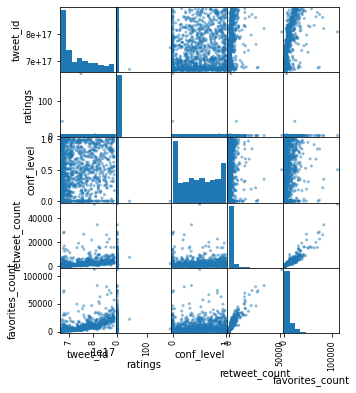

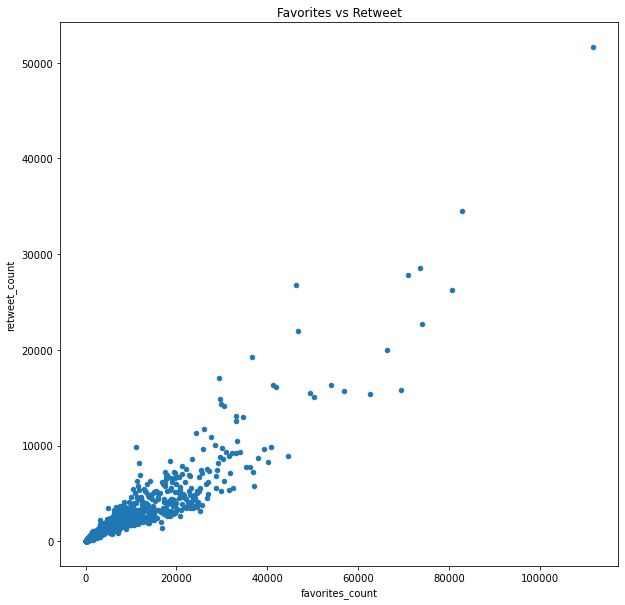

In [24]:
pd.plotting.scatter_matrix(df, figsize = (5,6));
df.plot(x='favorites_count', y= 'retweet_count', kind = 'scatter', title = 'Favorites vs Retweet', figsize=(10,10));

### Analysis #4:

Determine whether any correlation between rating, favorites_count and retweet_count

In [16]:
# Check for correlation between ratings, favorites_count and retweet_count
corr_fact = df[['ratings', 'favorites_count','retweet_count']].corr()
corr_fact

,ratings,favorites_count,retweet_count
ratings,1.000000,0.01920,0.024323
favorites_count,0.019200,1.00000,0.925190
retweet_count,0.024323,0.92519,1.000000


### Insights #4

At a rating of 1, favorites and retweet count are low while at a ratings value of 0.0192 and 0.024323 the favorites and retweet count are low. Hence per relationship between the three variables, ratings doesn't impact favorites count and retweet count.

### Visualize #4:

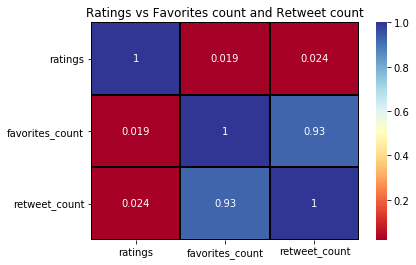

In [42]:
sns.heatmap(corr_fact, cmap= 'RdYlBu', annot=True, linewidth=1, linecolor ='black')
plt.title('Ratings vs Favorites count and Retweet count')
plt.show()